In [1]:
import sys

import numpy as np
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

sys.path.extend(["../../../"])


# Import necessary libraries
from src.para_voro import *
from src.para_voro_plots import *

In [2]:
n_samples = 10
n_dim = 2

samples = np.arange(n_samples)
samples = np.vstack([samples, np.zeros(n_samples)]).T

R = rotation_matrix_3d(np.pi / 4, 2)[:2, :2]

samples_ = samples.copy()
samples_[:, 1] += 0.5

samples = np.vstack([samples, samples_])

print(samples.shape)

samples = samples @ R

# labels = (np.arange(len(samples)) % 2).astype(int)
labels = (np.arange(len(samples))).astype(int)

labels = np.concat([labels])

samples = (samples - samples.min(0))
samples = samples / samples.max(0)


aabbox = np.array([
    [0, 1],
    [0, 1]
])

bandwidths = np.array([0.1, 0.1])

colors = make_object_array(get_12_categorical_colors() * 10)
dim_names = ["$x_1$", "$x_2$"]

(20, 2)


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro_plots.py:89: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], color=colors, cmap='winter', s=5)


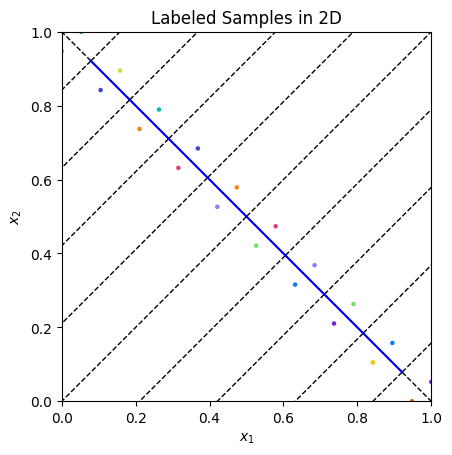

In [3]:
_ = plot_data(samples, labels, aabbox, colors, dim_names)

compute ridge vertices


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro.py:295: NumbaPerformanceWarning: '@' is faster on contiguous arrays, called on (Array(float64, 1, 'A', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d_ = point @ eq[:-1] + eq[-1]
c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro.py:334: NumbaPerformanceWarning: np.dot() is faster on contiguous arrays, called on (Array(float64, 1, 'C', False, aligned=True), Array(float64, 1, 'A', False, aligned=True))
  d = np.dot(points[i], ridge_halfspace_definition[:-1]) + ridge_halfspace_definition[-1]


plot relevant ridges


c:\Users\bauerrn\Projekte\VoroParaSense\examples\notebooks\plot_examples\../../..\src\para_voro_plots.py:222: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(samples[:, 0], samples[:, 1], c=colors, cmap='winter', s=2**6)


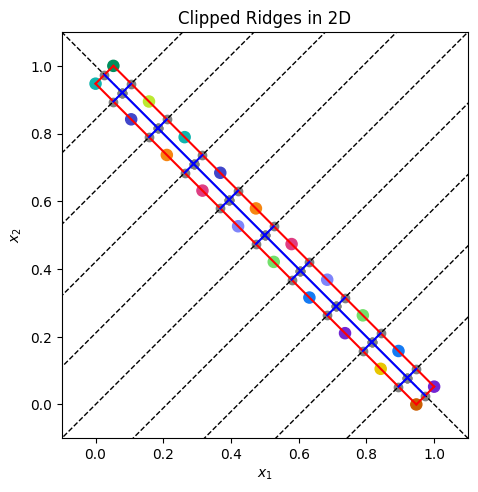

In [4]:
print("compute ridge vertices")
assert len(bandwidths) == len(aabbox) == n_dim
cch = True

vor = Voronoi(samples)
ridge_vertices = generate_geometric_segment_boundaries_via_voronoi(samples=samples, labels=labels, clip_bbox=aabbox, clip_convex_hull=cch, verbose=False, vor=vor)
# ridge_vertices = make_object_array([np.array([[0.25, 0.0], [0.25, 0.5]]),
#                                     np.array([[0.0, 0.25], [0.5, 0.25]])], dtype=object)
print("plot relevant ridges")
f2 = plot_ridges(ridge_vertices, samples=samples, labels=labels, clip_convex_hull=cch, colors=colors, f=0.0, plot_legend=False, legend_kwargs=dict(ncol=2), dim_names=dim_names)
f2.gca().set_title("")
f2.savefig("primary_transition_directions.pdf", bbox_inches="tight")

In [5]:
identify_infinity_regions_and_neighbors_results = identify_infinity_regions_and_neighbors(vor)
[point_idx_region_mapping, _, _, _, _] = identify_infinity_regions_and_neighbors_results

D_i_s, sample_points, sample_points_min, sample_points_max = compute_label_distribution(samples, labels, bandwidths, aabbox, clip_convex_hull=cch, verbose=True, vor=vor, identify_infinity_regions_and_neighbors_results=identify_infinity_regions_and_neighbors_results)

compute voronoi for 20 samples in dimensionality 2...
compute sample points...
skipping region with idx 0 as it does not map to a point
failed to clip region with idx 10 at sample idx 4 for dimension 0
failed to clip region with idx 12 at sample idx 4 for dimension 1
failed to clip region with idx 19 at sample idx 5 for dimension 1


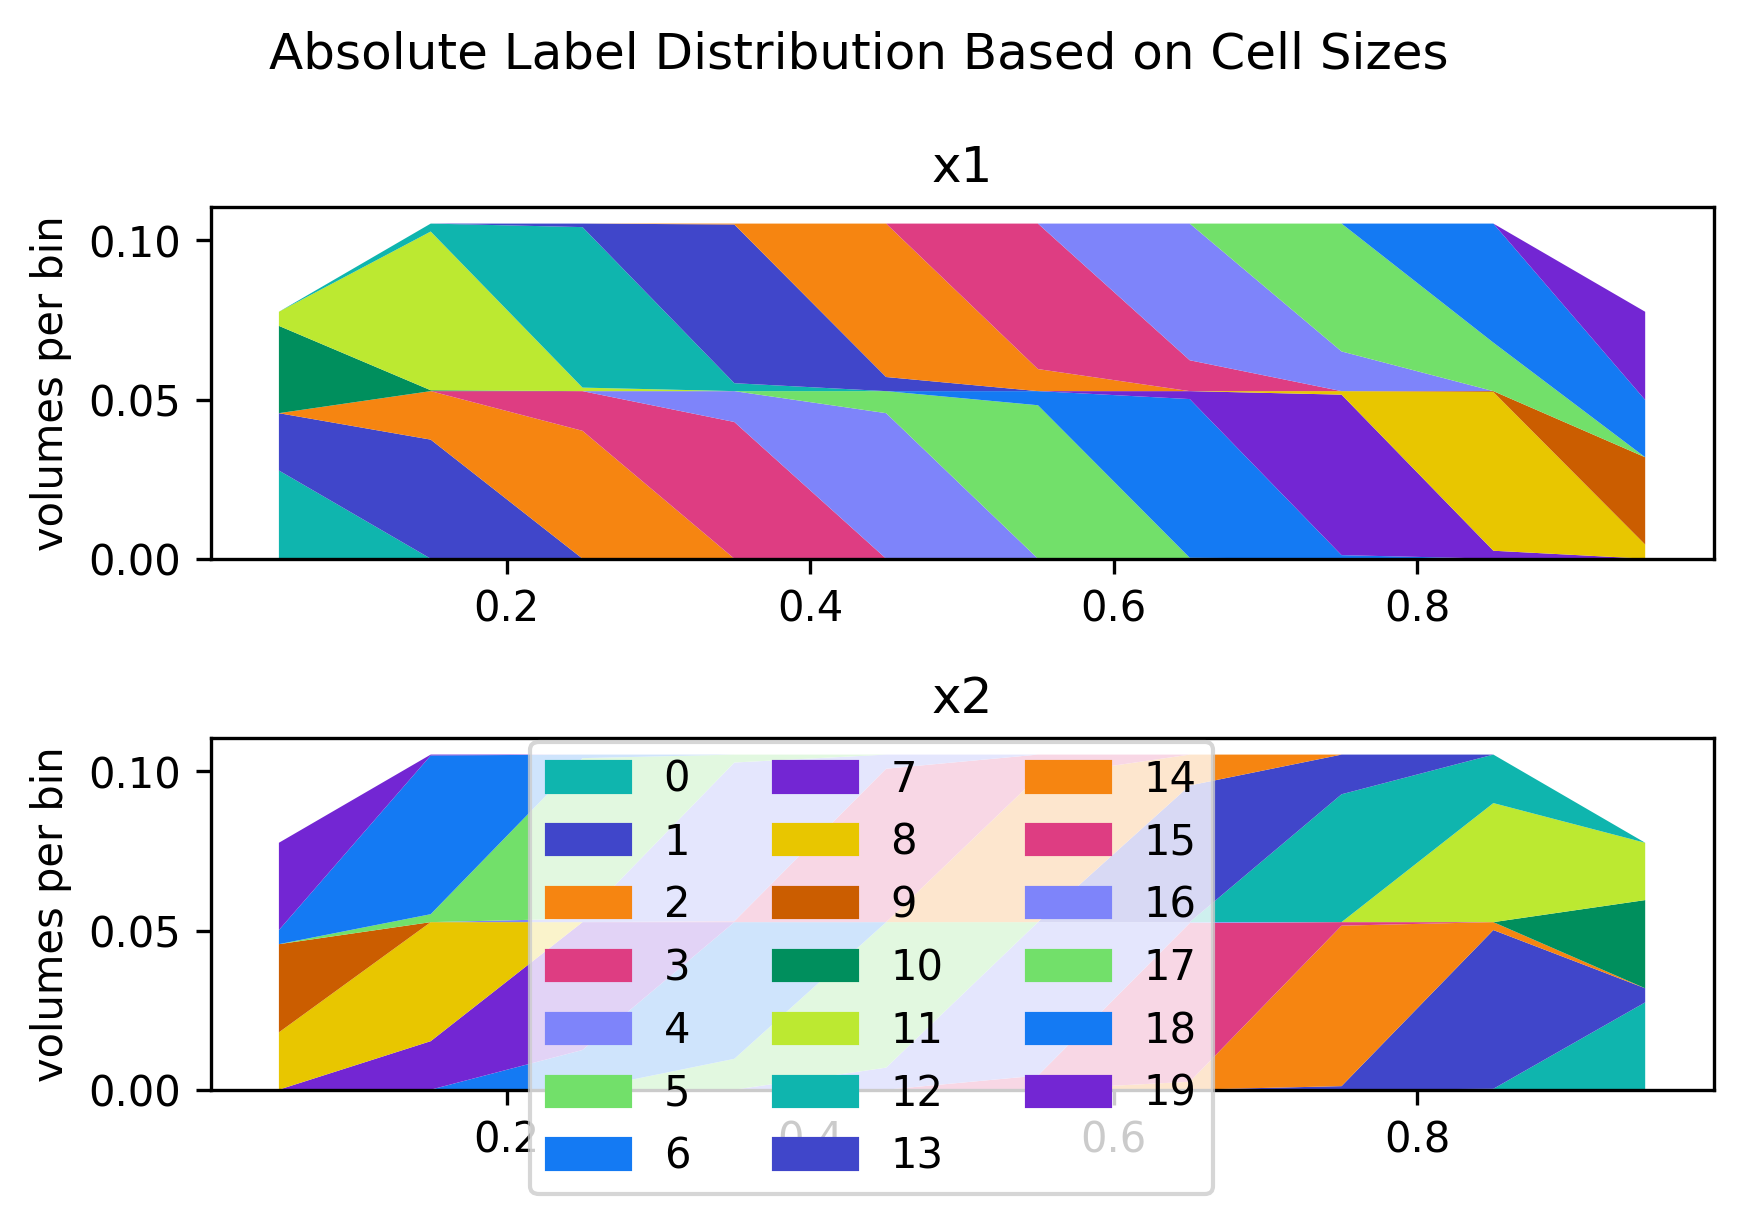

In [6]:
f = plot_label_distribution_matrix_list(sample_points[0:2], normalize_label_distribution_by_bandwidth(D_i_s, bandwidths), dim_labels=["x1", "x2"], line_labels=[f"{i}" for i in range(len(np.unique(labels)))],
                                    stack_plot_kwargs=dict(baseline='zero', colors=colors), horizontal_layout=False, fig_kwargs=dict(figsize=(6, 4)),
                                    legend_kwargs=dict(ncol=3, loc="lower center"), title="Absolute Label Distribution Based on Cell Sizes")

In [7]:
sample_points_min_max = compute_sample_points(aabbox, bandwidths)

ridge_based_para_sense_preparations_result = ridge_based_para_sense_preparations(ridge_vertices=ridge_vertices,
                                                                                     bandwidths=bandwidths,
                                                                                     clip_box=aabbox,
                                                                                     step_size=None,
                                                                                     sample_points_min_max=sample_points_min_max,
                                                                                     verbose=True)

got 28 ridges
got dimensionality 2
compute projection matrices of ridges
skipped 0 ridges due to errors... remaining are 28 ridges
compute sample points
compute trivial rejects
number of sample points per dimension:  [10, 10]


In [8]:
compute_clustered_normals_result = compute_clustered_normals(ridge_vertices=ridge_vertices, dim_labels=dim_names, ridge_based_para_sense_preparations_result=ridge_based_para_sense_preparations_result)
df_knn, kcs, normals_sorted, rvv_sorted, normals_sorted_tf = compute_clustered_normals_result

In [9]:
df_knn

,$x_1$,$x_2$,cluster_size,volume,cluster_distance
0,-0.707107,0.707107,18,0.669891,0.0
1,0.707107,0.707107,10,1.339781,0.0


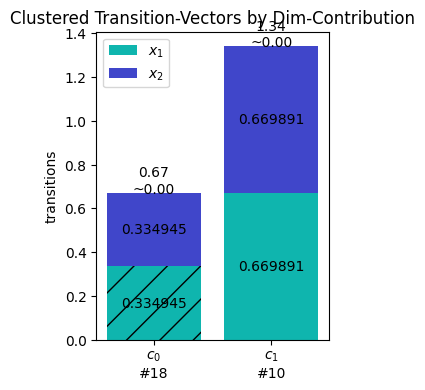

In [10]:
f = plot_clustered_normals_as_bar_chart(df_knn, dim_labels=dim_names, colors=colors)
f.gca().set_title("")
f.savefig("prim_trans_clust.pdf", bbox_inches="tight")